In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,100,1,38,0,1,0
1,98,0,28,1,-1,1
2,99,1,30,0,0,1
3,104,0,50,0,-1,0
4,104,1,13,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   fever          3018 non-null   int64
 1   bodyPain       3018 non-null   int64
 2   age            3018 non-null   int64
 3   runnyNose      3018 non-null   int64
 4   diffBreath     3018 non-null   int64
 5   infectionProb  3018 non-null   int64
dtypes: int64(6)
memory usage: 141.5 KB


In [13]:
df['diffBreath'].value_counts()

 1    1013
 0    1008
-1     997
Name: diffBreath, dtype: int64

In [15]:
import numpy as np

In [17]:
def train_test_split(data, ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[test_indices], data.iloc[train_indices]
    

In [18]:
test, train = train_test_split(df, 0.2)

In [35]:
test

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
1323,101,1,33,0,1,0
798,100,0,79,1,1,0
479,98,1,46,0,-1,0
44,101,0,28,1,-1,0
414,100,1,90,1,-1,1
...,...,...,...,...,...,...
889,103,1,75,1,0,1
2705,101,0,69,0,0,1
199,103,1,28,1,1,1
283,98,1,72,0,1,0


In [41]:
x_train =train[['fever','bodyPain', 'age', 'runnyNose', 'diffBreath']].to_numpy()
x_test  =test[['fever','bodyPain', 'age', 'runnyNose', 'diffBreath']].to_numpy()

y_train =train[['infectionProb']].to_numpy().reshape(2415 ,)
y_test = test[['infectionProb']].to_numpy().reshape(603 ,)
y_train

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [33]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()
clf.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
clf.predict_proba([[104,24,0,1,-1]])

array([[0.20236024, 0.79763976]])

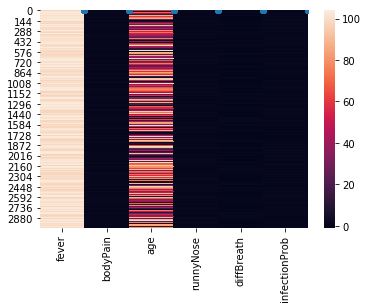

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df)
plt.scatter(df.age, df.diffBreath)
plt.show()